<a href="https://colab.research.google.com/github/furygrim/Badminton-Court-Detection-App/blob/main/courtdetectionyolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before running the code,Paste your own  input video path and output video path in the variables. I have provided the link to saved model/weights


https://drive.google.com/file/d/1yhVHdJUeiBQEKOSqAMIHz1qmmHvCxHd4/view?usp=sharing

In order to save time by not retraining the model,Use this saved model directly by pasting its path in the code where model is loaded.

Make sure Google colab GPU is being used

In [ ]:
!nvidia-smi

Mon Mar  3 03:49:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Installing required packages and importing necessary modules.

In [ ]:

!pip install streamlit -q
!npm install localtunnel -q

!pip install roboflow -q
!pip install ultralytics -q



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 3s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━

In [ ]:
from roboflow import Roboflow
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Using annotated Dataset from Roboglow to fine tune the YOLO-V8 model

In [ ]:
rf = Roboflow(api_key="ueb9x7kmupZkmaMP3c42")
project = rf.workspace("himani-jain").project("badmintonc")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BadmintonC-6 in yolov8:: 100%|██████████| 5084/5084 [00:01<00:00, 3124.69it/s]


You can skip the following cell in which model is trained. I have attached the saved model/weights file.

Training and Fine tuning the Yolo V8 model using the annotated dataset.

In [ ]:

model = YOLO("yolov8n.pt")  # You can choose other variants like yolov8s.pt, yolov8m.pt, etc.

# Step 3: Fine-tune the pre-trained model on your dataset
# The data.yaml file (inside dataset.location) specifies your training and validation splits.
model.train(data=dataset.location + "/data.yaml", epochs=50, imgsz=800)

# Step 4 (Optional): Evaluate the model on the validation set
metrics = model.val(data=dataset.location + "/data.yaml")
print(metrics)

100%|██████████| 6.25M/6.25M [00:00<00:00, 95.1MB/s]


Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/BadmintonC-6/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.6MB/s]


AMP: checks passed ✅


train: Scanning /content/BadmintonC-6/train/labels... 1879 images, 5 backgrounds, 0 corrupt: 100%|██████████| 1879/1879 [00:00<00:00, 2121.06it/s]


train: New cache created: /content/BadmintonC-6/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1849, len(boxes) = 1874. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/BadmintonC-6/valid/labels... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<00:00, 734.44it/s]


val: New cache created: /content/BadmintonC-6/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 354, len(boxes) = 369. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.18G      0.691       1.52      1.257         20        800: 100%|██████████| 118/118 [00:50<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]

                   all        369        369      0.957      0.969       0.99       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.02G     0.5621     0.8248       1.11         13        800: 100%|██████████| 118/118 [00:46<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]


                   all        369        369      0.892      0.674      0.755      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.14G     0.5575      0.643      1.094         13        800: 100%|██████████| 118/118 [00:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]


                   all        369        369      0.874      0.883      0.927      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.02G     0.5234     0.5381       1.07         17        800: 100%|██████████| 118/118 [00:44<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        369      0.652      0.905      0.787      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.13G     0.4781      0.458      1.041         19        800: 100%|██████████| 118/118 [00:44<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        369      0.968      0.927      0.982      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.02G     0.4464      0.403      1.024         19        800: 100%|██████████| 118/118 [00:44<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        369      0.989      0.971      0.993       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.13G     0.4288     0.3929      1.012         10        800: 100%|██████████| 118/118 [00:45<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.35it/s]

                   all        369        369      0.985      0.976      0.992      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.02G     0.4125     0.3773      1.004         11        800: 100%|██████████| 118/118 [00:45<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]

                   all        369        369       0.97      0.957      0.988      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.13G     0.3919     0.3558     0.9843         17        800: 100%|██████████| 118/118 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        369          1      0.986      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.02G     0.3688     0.3303     0.9806         13        800: 100%|██████████| 118/118 [00:46<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        369        369      0.995      0.991      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.13G     0.3777     0.3329     0.9753         17        800: 100%|██████████| 118/118 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.72it/s]

                   all        369        369      0.976      0.981      0.992      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.02G     0.3585     0.3226     0.9722         19        800: 100%|██████████| 118/118 [00:47<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.70it/s]

                   all        369        369      0.994      0.986      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.13G     0.3349     0.2972     0.9532         15        800: 100%|██████████| 118/118 [00:48<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.90it/s]


                   all        369        369      0.986      0.975      0.994      0.959

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.02G     0.3425     0.3085     0.9633         22        800: 100%|██████████| 118/118 [00:47<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.79it/s]

                   all        369        369      0.997      0.997      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.13G     0.3419     0.3005     0.9573         21        800: 100%|██████████| 118/118 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.91it/s]

                   all        369        369      0.995      0.992      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.02G     0.3338     0.2933       0.95         15        800: 100%|██████████| 118/118 [00:47<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.82it/s]

                   all        369        369      0.989      0.992      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.13G     0.3252     0.2837     0.9524         14        800: 100%|██████████| 118/118 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.86it/s]

                   all        369        369      0.994      0.997      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.02G     0.3197     0.2722     0.9489         13        800: 100%|██████████| 118/118 [00:46<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.71it/s]

                   all        369        369      0.997      0.995      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.13G     0.3189       0.28     0.9401         17        800: 100%|██████████| 118/118 [00:45<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.46it/s]

                   all        369        369      0.994      0.995      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.02G     0.3053     0.2669     0.9428         19        800: 100%|██████████| 118/118 [00:45<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.38it/s]

                   all        369        369          1      0.989      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.13G     0.2967     0.2651     0.9337         17        800: 100%|██████████| 118/118 [00:46<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        369          1      0.997      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.02G     0.2969     0.2542     0.9314         13        800: 100%|██████████| 118/118 [00:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]


                   all        369        369          1      0.997      0.995      0.978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.13G     0.2925     0.2478     0.9337         22        800: 100%|██████████| 118/118 [00:46<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        369        369      0.997      0.992      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.01G      0.286       0.24     0.9274         10        800: 100%|██████████| 118/118 [00:46<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        369      0.999      0.997      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.13G     0.2785     0.2375     0.9238         19        800: 100%|██████████| 118/118 [00:46<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.49it/s]

                   all        369        369      0.999      0.997      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.01G     0.2801     0.2349     0.9271         17        800: 100%|██████████| 118/118 [00:47<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.80it/s]

                   all        369        369      0.989      0.989      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.13G     0.2823     0.2386     0.9246         19        800: 100%|██████████| 118/118 [00:47<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

                   all        369        369      0.993      0.997      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.01G     0.2719     0.2296     0.9204         18        800: 100%|██████████| 118/118 [00:47<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.81it/s]

                   all        369        369          1      0.997      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.13G      0.275      0.231     0.9205         11        800: 100%|██████████| 118/118 [00:47<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.76it/s]


                   all        369        369      0.997      0.997      0.995      0.982

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.01G       0.26     0.2253     0.9163         15        800: 100%|██████████| 118/118 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.70it/s]

                   all        369        369      0.995      0.997      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.13G     0.2588     0.2149     0.9079         16        800: 100%|██████████| 118/118 [00:47<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.79it/s]

                   all        369        369      0.999      0.997      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.01G     0.2534     0.2184     0.9117         20        800: 100%|██████████| 118/118 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

                   all        369        369      0.997      0.997      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.13G     0.2546     0.2141     0.9128         20        800: 100%|██████████| 118/118 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.44it/s]

                   all        369        369      0.995          1      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.01G     0.2535     0.2112     0.9068         14        800: 100%|██████████| 118/118 [00:46<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        369          1      0.997      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.13G     0.2397      0.206     0.9085         15        800: 100%|██████████| 118/118 [00:46<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        369      0.997      0.997      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.01G     0.2419     0.2031     0.9037         17        800: 100%|██████████| 118/118 [00:46<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.35it/s]

                   all        369        369          1      0.995      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.13G     0.2357      0.201     0.9017         18        800: 100%|██████████| 118/118 [00:46<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.39it/s]

                   all        369        369          1      0.997      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.01G     0.2304     0.1921     0.8962         15        800: 100%|██████████| 118/118 [00:45<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.34it/s]

                   all        369        369      0.994      0.997      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.13G     0.2355     0.1921     0.9006         18        800: 100%|██████████| 118/118 [00:46<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.69it/s]


                   all        369        369          1      0.997      0.995      0.991

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.01G     0.2284     0.1888     0.9035         13        800: 100%|██████████| 118/118 [00:46<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.80it/s]

                   all        369        369      0.997      0.997      0.995       0.99


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.13G     0.2069      0.165     0.9004          7        800: 100%|██████████| 118/118 [00:46<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.05it/s]

                   all        369        369          1      0.997      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.02G     0.2025     0.1568     0.9009          7        800: 100%|██████████| 118/118 [00:43<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.38it/s]

                   all        369        369          1      0.997      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.13G     0.1959     0.1521     0.8848          7        800: 100%|██████████| 118/118 [00:44<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.36it/s]

                   all        369        369      0.997      0.996      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.02G     0.1897     0.1515     0.8793          7        800: 100%|██████████| 118/118 [00:44<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.62it/s]

                   all        369        369          1      0.997      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.13G     0.1896     0.1396     0.8853          7        800: 100%|██████████| 118/118 [00:43<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.84it/s]

                   all        369        369          1      0.997      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.02G     0.1914      0.144     0.8901          7        800: 100%|██████████| 118/118 [00:44<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.73it/s]

                   all        369        369          1      0.997      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.13G     0.1807     0.1342      0.881          7        800: 100%|██████████| 118/118 [00:44<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.05it/s]

                   all        369        369          1      0.997      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.02G     0.1836     0.1337     0.8841          7        800: 100%|██████████| 118/118 [00:43<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        369      0.997      0.997      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.13G     0.1745     0.1294     0.8744          7        800: 100%|██████████| 118/118 [00:43<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        369          1      0.997      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.02G     0.1702     0.1232     0.8737          7        800: 100%|██████████| 118/118 [00:42<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.78it/s]

                   all        369        369          1      0.997      0.995      0.992



50 epochs completed in 0.723 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]


                   all        369        369          1      0.997      0.995      0.992
Speed: 0.5ms preprocess, 3.4ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/BadmintonC-6/valid/labels.cache... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 354, len(boxes) = 369. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]


                   all        369        369          1      0.997      0.995      0.992
Speed: 2.1ms preprocess, 6.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78fed9011ed0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033

Validation and testing the model.


0: 800x800 1 court, 260.6ms
1: 800x800 1 court, 260.6ms
2: 800x800 1 court, 260.6ms
3: 800x800 1 court, 260.6ms
Speed: 15.1ms preprocess, 260.6ms inference, 6.6ms postprocess per image at shape (1, 3, 800, 800)

Prediction details for image 1:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9780])
data: tensor([[  0.0000, 261.4692, 415.9732, 374.8209,   0.9780,   0.0000]])
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([1, 6])
xywh: tensor([[207.9866, 318.1451, 415.9732, 113.3516]])
xywhn: tensor([[0.5000, 0.7648, 0.9999, 0.2725]])
xyxy: tensor([[  0.0000, 261.4692, 415.9732, 374.8209]])
xyxyn: tensor([[0.0000, 0.6285, 0.9999, 0.9010]])


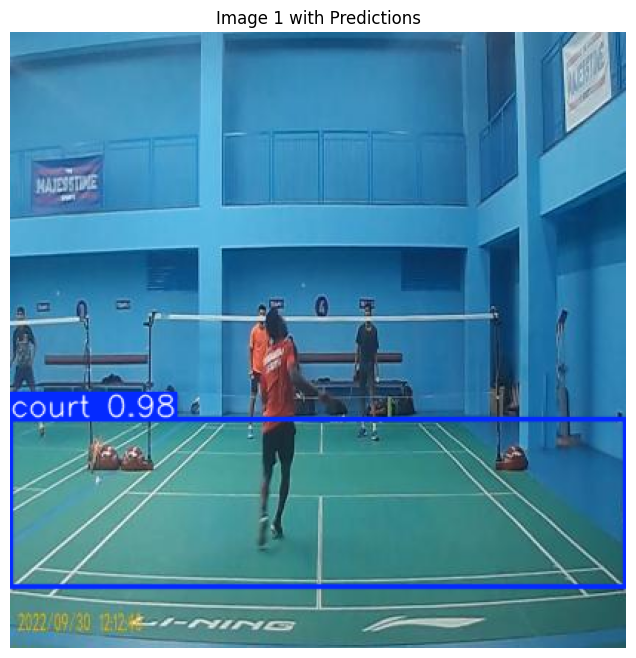


Prediction details for image 2:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9703])
data: tensor([[ 27.9443, 114.4766, 393.1285, 386.9661,   0.9703,   0.0000]])
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([1, 6])
xywh: tensor([[210.5364, 250.7214, 365.1843, 272.4895]])
xywhn: tensor([[0.5061, 0.6027, 0.8778, 0.6550]])
xyxy: tensor([[ 27.9443, 114.4766, 393.1285, 386.9661]])
xyxyn: tensor([[0.0672, 0.2752, 0.9450, 0.9302]])


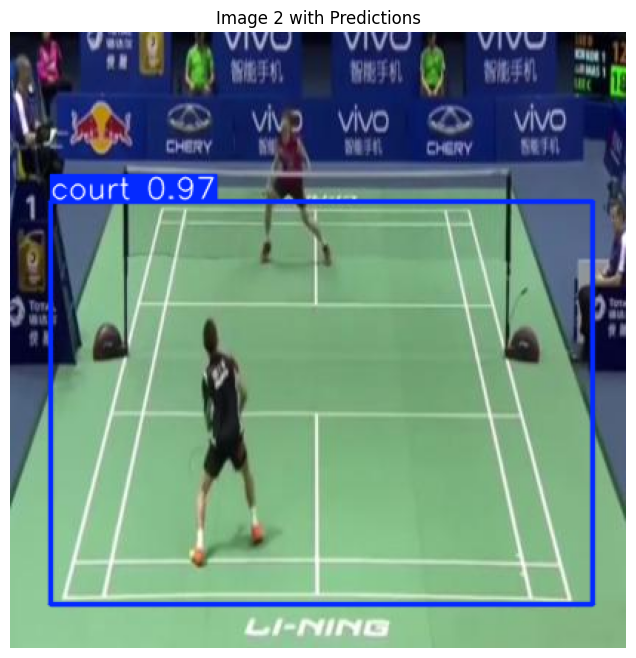


Prediction details for image 3:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9784])
data: tensor([[2.3169e-03, 2.6092e+02, 4.1600e+02, 3.7475e+02, 9.7845e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([1, 6])
xywh: tensor([[208.0012, 317.8340, 415.9977, 113.8295]])
xywhn: tensor([[0.5000, 0.7640, 1.0000, 0.2736]])
xyxy: tensor([[2.3169e-03, 2.6092e+02, 4.1600e+02, 3.7475e+02]])
xyxyn: tensor([[5.5695e-06, 6.2721e-01, 1.0000e+00, 9.0084e-01]])


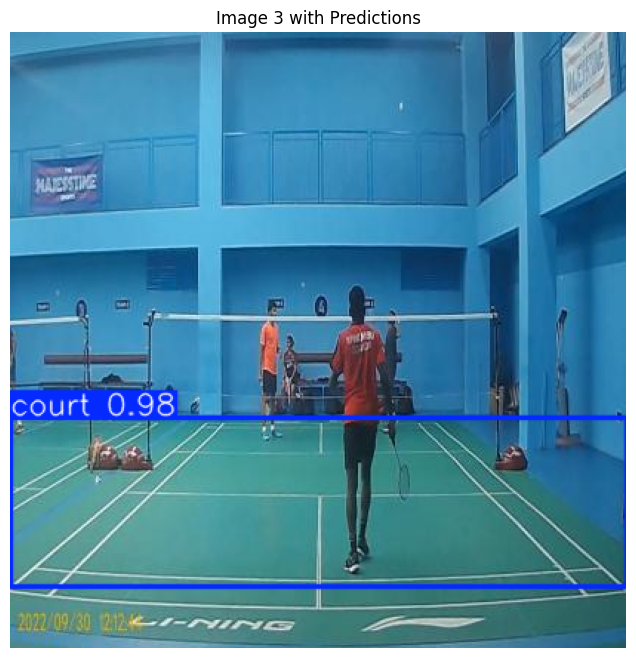


Prediction details for image 4:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9563])
data: tensor([[ 66.6876,  88.9366, 350.1261, 325.8228,   0.9563,   0.0000]])
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([1, 6])
xywh: tensor([[208.4068, 207.3797, 283.4385, 236.8861]])
xywhn: tensor([[0.5010, 0.4985, 0.6813, 0.5694]])
xyxy: tensor([[ 66.6876,  88.9366, 350.1261, 325.8228]])
xyxyn: tensor([[0.1603, 0.2138, 0.8416, 0.7832]])


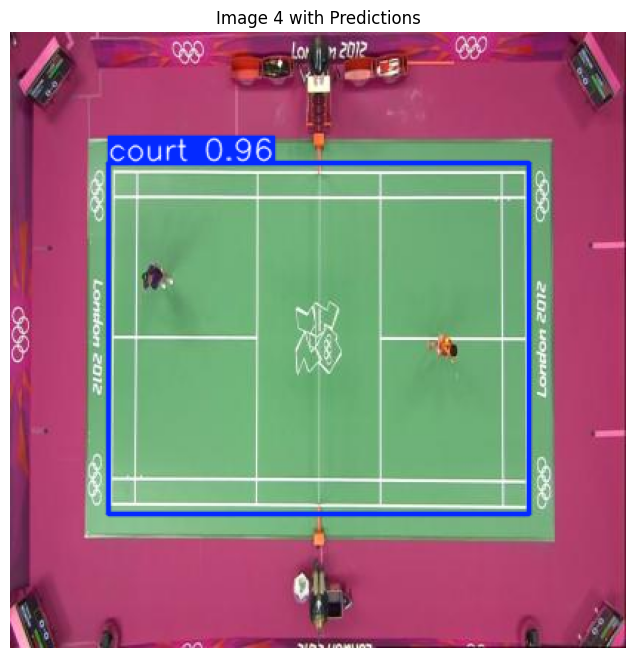

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)


100%|██████████| 755k/755k [00:00<00:00, 20.9MB/s]
val: Scanning /content/BadmintonC-6/valid/labels... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<00:00, 2424.62it/s]


val: New cache created: /content/BadmintonC-6/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 354, len(boxes) = 369. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:55<00:00,  4.82s/it]


                   all        369        369          1      0.957      0.978      0.976
Speed: 6.7ms preprocess, 298.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val

Evaluation Metrics:
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a712d69dd90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,  

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the trained YOLO model.
model = YOLO("/content/best.pt")

# List of image paths for prediction.
image_paths = [
    "/content/BadmintonC-6/test/images/2022_0930_121035_028_mp4-109_jpg.rf.9dfac2b595bc1f29a14fb1adc95b2a01.jpg",
    "/content/BadmintonC-6/test/images/Screenshot-from-2022-04-19-16-40-24_png.rf.71215fb27ad89614d93669b14ee7f66b.jpg",
    "/content/BadmintonC-6/test/images/2022_0930_121035_028_mp4-113_jpg.rf.98244596c86dc3c6b62a76ce3dcd6b79.jpg",  # Replace with your second image path
    "/content/BadmintonC-6/test/images/b2_mp4-182_jpg.rf.d187c5e9f5916f16c48446a8b8accb09.jpg",

    # Replace with your third image path
]

# Run predictions on all three images.
results = model.predict(source=image_paths, conf=0.25)

# Loop through each prediction result to print details and display annotated images.
for i, result in enumerate(results):
    print(f"\nPrediction details for image {i+1}:")
    print(result.boxes)  # prints bounding boxes, class labels, and confidence scores

    # Annotate the image with detections.
    annotated_img = result.plot()  # returns an image with detections overlaid

    # Display the annotated image.
    plt.figure(figsize=(10, 8))
    # Convert image from BGR (OpenCV format) to RGB.
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i+1} with Predictions")
    plt.axis("off")
    plt.show()

# Evaluate the model on the test dataset.
# Adjust the 'data' parameter according to your dataset configuration if needed.

# eval_results = model.val(data=dataset.location + "/data.yaml")
# print("\nEvaluation Metrics:")
eval_results = model.val(data=dataset.location + "/data.yaml", conf=0.95)
print("\nEvaluation Metrics:")
print(eval_results)
# print(eval_results)

# Assuming eval_results is a dictionary with keys 'precision', 'recall', 'mAP50', and 'mAP50-95'
metrics = {}
if isinstance(eval_results, dict):
    for key in ["precision", "recall", "mAP50", "mAP50-95"]:
        if key in eval_results:
            metrics[key] = eval_results[key]

# Plot the evaluation metrics in a bar chart for a clear visual overview.
if metrics:
    metric_names = list(metrics.keys())
    metric_values = list(metrics.values())

    plt.figure(figsize=(8, 6))
    bars = plt.bar(metric_names, metric_values, color='skyblue')
    plt.ylim([0, 1])
    plt.title("Evaluation Metrics")
    plt.ylabel("Value")

    # Annotate each bar with its metric value.
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')
    plt.show()


Running the model on input video and
Before Running the model, Upload the input video file to the colab session storage and then paste the path to the video file in the variable input_video_path.

In [ ]:
import numpy as np
import cv2
from ultralytics import YOLO
from google.colab import files  # Import files from google.colab for downloading

# Define input and output video paths.
input_video_path = "PXL_20250125_091952723.TS.mp4"#paste here the path to input video file.
output_video_path = "outvideo.mp4"

# Load the YOLOv8 model
model = YOLO("/content/best.pt") #paste the path to savel model/weights.



# Define separate offsets for x and y directions (in pixels).
x_offset = -220
y_offset = 100

# Open the input video.
cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    raise IOError("Cannot open video file: " + input_video_path)

# Get video properties.
fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object for the output video.
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference on the current frame using your YOLOv8 model.
    results = model(frame, conf=0.25)
    result = results[0]

    # Create a black image with the same dimensions as the frame.
    processed_frame = np.zeros_like(frame)

    if result.boxes is not None and len(result.boxes) > 0:
        max_area = 0
        best_box = None

        # Loop over all detected boxes to choose the one with the largest area.
        for box in result.boxes:
            coords = box.xyxy[0]
            x1, y1, x2, y2 = map(int, coords.tolist())
            area = (x2 - x1) * (y2 - y1)
            if area > max_area:
                max_area = area
                best_box = (x1, y1, x2, y2)

        if best_box is not None:
            x1, y1, x2, y2 = best_box

            # Adjust the box boundaries using separate x and y offsets.
            x1_new = max(0, x1 - x_offset)
            y1_new = max(0, y1 - y_offset)
            x2_new = min(width, x2 + x_offset)
            y2_new = min(height, y2 + y_offset)

            # Copy the region corresponding to the adjusted bounding box.
            processed_frame[y1_new:y2_new, x1_new:x2_new] = frame[y1_new:y2_new, x1_new:x2_new]

    # Write the processed frame (with the court in focus) to the output video.
    out.write(processed_frame)

# Release resources.
cap.release()
out.release()

# Download the output video.
files.download(output_video_path)



0: 480x800 1 court, 148.7ms
Speed: 12.1ms preprocess, 148.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 139.1ms
Speed: 4.2ms preprocess, 139.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 150.3ms
Speed: 4.4ms preprocess, 150.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 133.6ms
Speed: 4.4ms preprocess, 133.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 134.6ms
Speed: 4.3ms preprocess, 134.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 136.0ms
Speed: 4.2ms preprocess, 136.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 135.4ms
Speed: 4.1ms preprocess, 135.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 court, 131.2ms
Speed: 4.1ms preprocess, 131.2ms inference, 0.7ms postprocess per image at shape 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

%%writefile app.py
import streamlit as st
import numpy as np
import cv2
from ultralytics import YOLO
import tempfile

st.title("Badminton Court Detection App")

st.write("Upload a video file to process with  YOLOv8 model.")

# File uploader widget.
uploaded_file = st.file_uploader("Choose a video...", type=["mp4", "TS"])
if uploaded_file is not None:
    # Save the uploaded video to a temporary file.
    tfile = tempfile.NamedTemporaryFile(delete=False, suffix=".mp4")
    tfile.write(uploaded_file.read())
    input_video_path = tfile.name

    st.video(uploaded_file)

    # Slider widgets for offset parameters.
    x_offset = st.slider("X Offset (in pixels):", min_value=-500, max_value=500, value=-220, step=10)
    y_offset = st.slider("Y Offset (in pixels):", min_value=-500, max_value=500, value=100, step=10)

    # Button to start processing.
    if st.button("Process Video"):
        st.text("Processing video, please wait...")
        # Load the YOLOv8 model (update the path if needed).
        model = YOLO("/content/best.pt")

        cap = cv2.VideoCapture(input_video_path)
        if not cap.isOpened():
            st.error("Cannot open video file")
        else:
            fps = cap.get(cv2.CAP_PROP_FPS)
            width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            output_video_path = "processed_video.mp4"

            fourcc = cv2.VideoWriter_fourcc(*"mp4v")
            out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                # Run inference on the current frame.
                results = model(frame, conf=0.25)
                result = results[0]
                processed_frame = np.zeros_like(frame)

                if result.boxes is not None and len(result.boxes) > 0:
                    max_area = 0
                    best_box = None
                    # Choose the detection with the largest area.
                    for box in result.boxes:
                        coords = box.xyxy[0]
                        x1, y1, x2, y2 = map(int, coords.tolist())
                        area = (x2 - x1) * (y2 - y1)
                        if area > max_area:
                            max_area = area
                            best_box = (x1, y1, x2, y2)
                    if best_box is not None:
                        x1, y1, x2, y2 = best_box
                        # Adjust the box boundaries using the specified offsets.
                        x1_new = max(0, x1 - int(x_offset))
                        y1_new = max(0, y1 - int(y_offset))
                        x2_new = min(width, x2 + int(x_offset))
                        y2_new = min(height, y2 + int(y_offset))
                        processed_frame[y1_new:y2_new, x1_new:x2_new] = frame[y1_new:y2_new, x1_new:x2_new]
                out.write(processed_frame)

            cap.release()
            out.release()
            st.success("Video processing complete!")
            st.video(output_video_path)

            # Provide a download button for the processed video.
            with open(output_video_path, "rb") as file:
                st.download_button(
                    label="Download Processed Video",
                    data=file,
                    file_name=output_video_path,
                    mime="video/mp4"
                )


Writing app.py


In [ ]:
print("The tunnel password is:\n")
!curl https://loca.lt/mytunnelpassword

print("\n")
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501

The tunnel password is:

^C


⠙⠹⠸⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C
